# NAME:Tushar Pawar
# College : P.E.S  Modern college

# TASK NO 5 : SALES PRICE PREDICTION

In [ ]:
# import all library 

In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read The Csv File

In [6]:
df = pd.read_csv('/content/Advertising.csv')

In [ ]:
#1st 5 Entry

In [7]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
# Dimention Of DataSet 

In [8]:
df.shape 

(200, 5)

In [9]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [ ]:
# Information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
# Stat About Data

In [11]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [12]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
# Import MATPLOTlib library

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Plotting The Point of Data

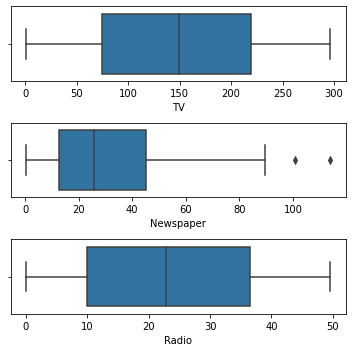

In [14]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

In [ ]:
#Displot

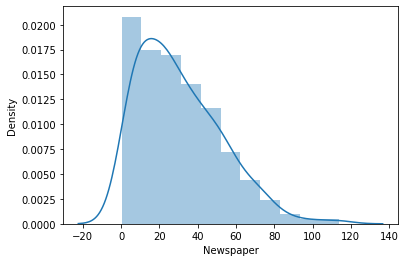

In [15]:
sns.distplot(df['Newspaper'])

In [16]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [17]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [18]:
data = df.copy()

In [19]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

In [ ]:
# Newspaper

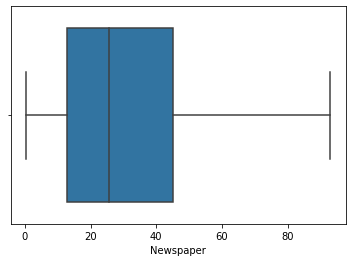

In [20]:
sns.boxplot(data['Newspaper'])

In [ ]:
# Sales

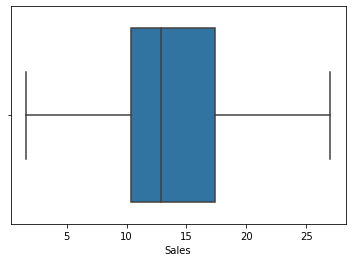

In [21]:
sns.boxplot(data['Sales']);

In [ ]:
# Scatter Points

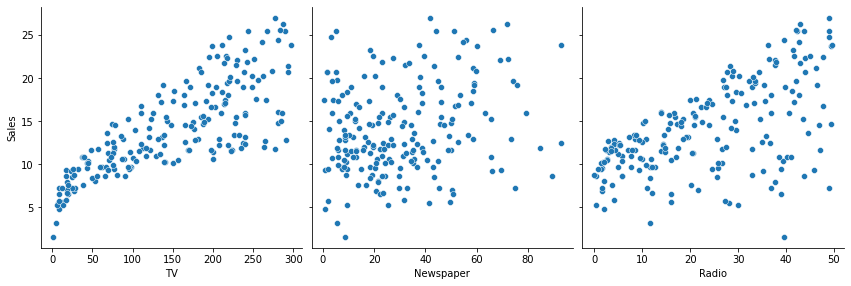

In [22]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [ ]:
# CREATING HeatMap

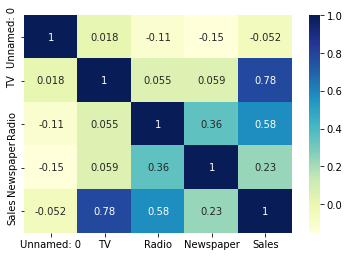

In [23]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [24]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [25]:
print(important_features)

['TV', 'Radio', 'Sales']


In [26]:
X = data['TV']
y = data['Sales']

In [27]:
X = X.values.reshape(-1,1)

In [ ]:
# lENGTH OF X

In [28]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [ ]:
# LENGTH OF Y

In [30]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
# dIMENTION OF DATAFRAME

In [31]:
print(X.shape,y.shape)

(200, 1) (200,)


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [33]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [34]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [35]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [36]:
knn_train_pred = knn.predict(X_train)

In [37]:
knn_test_pred = knn.predict(X_test)

In [ ]:
# KNeighborsRegressor

In [38]:
print(knn_train_pred, knn_test_pred)

[20.82  8.72 17.66 14.54 19.74 14.46 16.98 20.08 14.48 16.2   7.72 11.64
  7.38 20.82 18.78 12.14 11.1  14.84 18.36 14.46  5.58 13.64 20.7  14.02
 14.98 12.14 19.9  10.28 14.02 20.34 13.58 16.48 14.74 12.14 18.78  7.18
 21.96 13.76 13.64 14.74 16.94 11.1   5.58 17.24 11.1  10.18 21.96 11.34
  8.64  7.18  4.44 19.9  10.28 19.4  10.32 12.96 10.28 14.02 17.98 21.3
 16.2  14.5  14.64 16.   13.76 19.42 11.52 15.78  4.44 15.94 19.42  7.72
  9.6  18.78 10.36 10.28 20.82 19.06  8.26 16.7   5.26 10.44 13.76  8.64
  8.64 16.08 12.34 18.6  10.44 11.52 16.94 15.78 10.04  7.18 19.16 18.6
 14.5  19.16  7.18 19.66  9.18 12.14 10.32 14.5  11.72 16.62 10.36 21.6
 14.54 18.6   5.58 12.1  18.9  14.02 18.78 20.38 10.28 19.9  16.    8.64
 18.76  9.16 19.9  17.9  13.1   7.72 16.4   5.58 17.98 10.36 12.14 19.4
 11.1  19.74] [12.34 17.46 22.28 14.98  9.58 16.62  6.26 15.78 10.44 20.08 14.48 11.52
 20.08 20.08 13.64 13.54 19.9  19.9  16.86  7.34  9.8  18.6  13.12 11.72
 15.62 20.7  14.02 15.62 17.86  6.88 14.4

In [39]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [ ]:
# K-Nearest Neighbors

In [40]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.4611986531303406
RMSE: 3.3492749102219763


In [ ]:
# HEAD OF DATA START FROM 0

In [41]:
Results.head() 

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.681942,0.461199,3.349275,0.220743


In [42]:
svr = SVR().fit(X_train,y_train)
svr

SVR()

In [43]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [ ]:
# PRINT SALE PREDICTION

In [44]:
print(svr_train_pred,svr_test_pred)

[18.75012502  8.51685942 16.06809441 12.941364   19.02521621 13.06400679
 16.62022639 19.07523872 18.10044529 17.80782517  8.17526489 11.67041988
  8.19278633 18.8463612  17.5922496  10.4826698  11.25835856 14.7201919
 17.48074742 13.71849022  7.98506329 12.68529256 18.79971851 13.12851027
 16.76656387 10.40172651 18.57409009 10.1208553  13.12388186 18.92277039
 12.52673301 15.7459295  14.40314774 10.52504429 17.52349554  8.23738155
 19.10287534 12.41729381 12.78568295 14.34851968 16.40756051 11.24639189
  8.00055442 17.61845033 11.31808642 11.37766066 19.11180866 10.91565506
  8.35925994  8.23198762  7.94857771 19.07420566 10.22089083 17.24577003
  8.826584   12.17410706 10.08591441 13.13777688 16.87104435 18.90011432
 17.72694052 14.99971877 13.98033521 15.43751766 12.32997427 16.19935217
 11.10616202 16.46090151  7.92422755 18.19038896 16.09793907  8.17526489
  9.5305521  18.95934332  9.080476   10.16007667 18.82815127 18.96664787
  8.45565156 17.89686316  7.96184025  8.93118367 12.

In [45]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.48592578098714356
RMSE: 3.271518435691407


In [46]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.681942,0.461199,3.349275,0.220743
1,Support Vector Machine,0.631957,0.485926,3.271518,0.146032


In [47]:
import statsmodels.api as sm

In [48]:
X_train_constant = sm.add_constant(X_train)

In [49]:
model = sm.OLS(y_train, X_train_constant).fit()

In [50]:
model.params

const    6.708980
x1       0.050459
dtype: float64

In [ ]:
# sUMMARY OF DATASET ANALYSIS

In [51]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     253.6
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           1.61e-32
Time:                        13:11:18   Log-Likelihood:                -346.56
No. Observations:                 134   AIC:                             697.1
Df Residuals:                     132   BIC:                             702.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7090      0.535     12.547      0.0

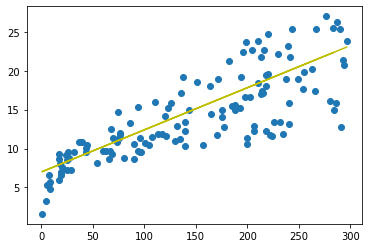

In [52]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [53]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

101    2.135108
91    -0.852094
85    -1.257571
99     3.669025
169   -6.054344
         ...   
138    0.721303
80     1.235987
84     4.218121
144   -0.163092
198    4.480977
Name: Sales, Length: 134, dtype: float64

In [54]:
y_train_pred

array([21.66489242,  8.15209421, 16.45757063, 13.53097505, 21.05434403,
       13.66721312, 16.92683509, 19.96443947, 18.31949092, 18.0116938 ,
        7.5768668 , 11.98694359,  7.61218778, 21.48828751, 17.79976791,
       10.50850823, 11.46217472, 15.2970241 , 17.69380497, 14.35344932,
        7.07732721, 13.23831549, 19.2630657 , 13.73785508, 17.05298145,
       10.412637  , 18.90481003, 10.08465646, 13.73280922, 21.32682017,
       13.05161887, 16.18509449, 15.0094104 , 10.55896678, 17.7341718 ,
        7.69796731, 20.11076925, 12.92042666, 13.35437014, 14.95895186,
       16.74518433, 11.44703716,  7.13283161, 17.82499718, 11.53786254,
       11.61355036, 20.17636535, 11.0332771 ,  7.90989319,  7.6878756 ,
        6.91585987, 20.87269327, 10.20071111, 17.47683322,  8.57090012,
       12.62272125, 10.04428962, 13.74794679, 17.14380683, 21.37727871,
       17.93096013, 15.54427097, 14.6107879 , 15.92271005, 12.81446372,
       16.56857942, 11.27043225, 16.79059702,  6.74430081, 18.42

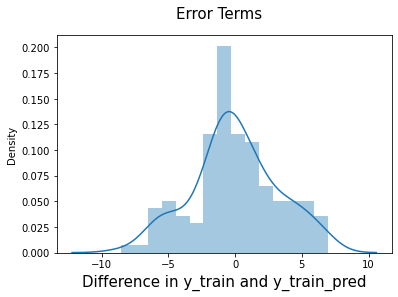

In [55]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

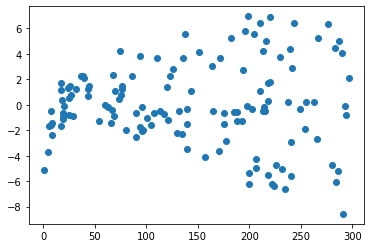

In [56]:
plt.scatter(X_train, res)
plt.show()

In [57]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [58]:
y_pred

array([12.24932802, 16.35160768, 20.51948346, 17.00756876,  9.23190706,
       18.68783829,  7.2993448 , 16.75527604,  8.63649623, 20.09058583,
       18.28921579, 11.16446931, 19.97453118, 19.89379751, 13.32409501,
       14.2676698 , 20.67085909, 20.90801425, 17.28509076,  7.37503262,
        9.14612753, 18.72820513, 12.56217099, 10.65483801, 15.20619872,
       19.24288228, 13.83877217, 15.12546505, 17.64839228,  7.36998677,
       18.17316114, 15.0649148 ,  8.96447677, 14.26262394, 15.83188467,
       16.19014034, 18.22866554, 16.67958822,  9.54475003, 10.51859994,
        9.61034614, 17.83508889, 16.03876471, 18.78370953, 20.847464  ,
       10.49841652, 10.16034428, 12.24932802,  7.14796917, 14.94886015,
        8.09658981, 13.58143359, 14.14152343, 18.21352797, 11.62868792,
       11.89107235, 13.78831362, 10.27135307, 17.93096013, 15.64014221,
       12.77409688, 10.56401263, 19.36902864, 11.10896491, 15.41307876,
       18.8089388 ])

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [60]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.333888850772156

In [61]:
r2 = r2_score(y_test, y_pred)
r2

0.4661376254207219

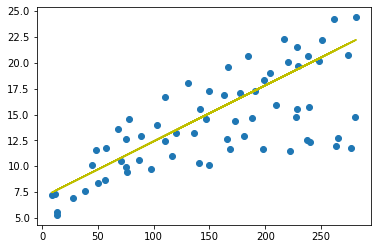

In [62]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()